### Objective

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


#### Preprocessing 

In [7]:
df['Age'].replace(0,np.nan,inplace=True)
df.dropna(inplace=True)

In [8]:
for i in df.columns:
    print(i,'\n')
    print(df[i].value_counts())
    print('---------------------------------------------------------------------------------------------------------')

Month 

Jan    1352
May    1336
Mar    1313
Oct    1301
Jun    1297
Dec    1259
Jul    1241
Apr    1235
Sep    1235
Feb    1219
Nov    1190
Aug    1122
Name: Month, dtype: int64
---------------------------------------------------------------------------------------------------------
WeekOfMonth 

3    3577
2    3474
4    3326
1    3113
5    1610
Name: WeekOfMonth, dtype: int64
---------------------------------------------------------------------------------------------------------
DayOfWeek 

Monday       2547
Friday       2392
Tuesday      2262
Thursday     2136
Wednesday    2108
Saturday     1945
Sunday       1710
Name: DayOfWeek, dtype: int64
---------------------------------------------------------------------------------------------------------
Make 

Pontiac      3837
Toyota       3121
Honda        2482
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         108
Saab          108
Mercury        83
Saturn         58
Nisson         30

In [9]:
colname=df.select_dtypes(['int64','float64']).columns
colname

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [10]:
catcol=df.select_dtypes(object).columns
catcol

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [11]:
df[colname]

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21.0,0,1,12,300,1,1994
1,3,4,34.0,0,2,15,400,4,1994
2,5,2,47.0,0,3,7,400,3,1994
3,2,1,65.0,0,4,4,400,2,1994
4,5,2,27.0,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35.0,1,15416,5,400,4,1996
15416,5,1,30.0,0,15417,11,400,3,1996
15417,5,1,24.0,1,15418,4,400,4,1996
15418,1,2,34.0,0,15419,6,400,4,1996


In [12]:
df[catcol]

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


#### Visualizating the Dataset

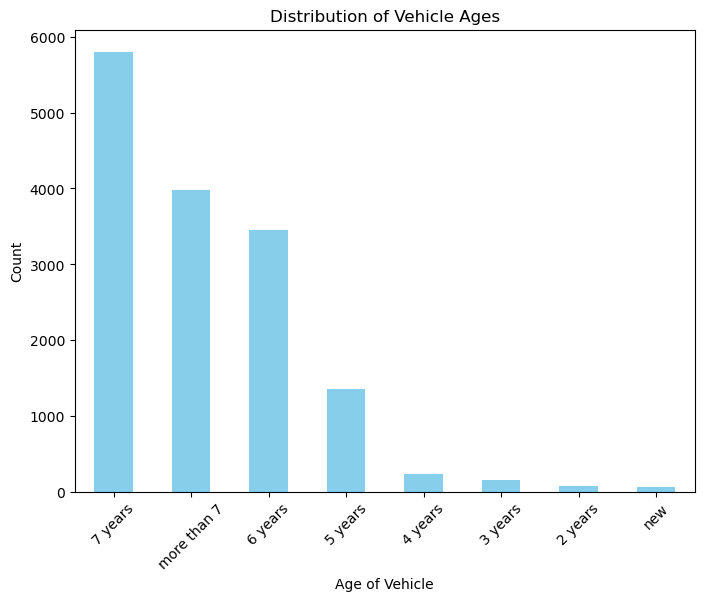

In [13]:
plt.figure(figsize=(8, 6))
df['AgeOfVehicle'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Age of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The majority of vehicles in the dataset are relatively young, with a gradual decrease in count as vehicle age increases.

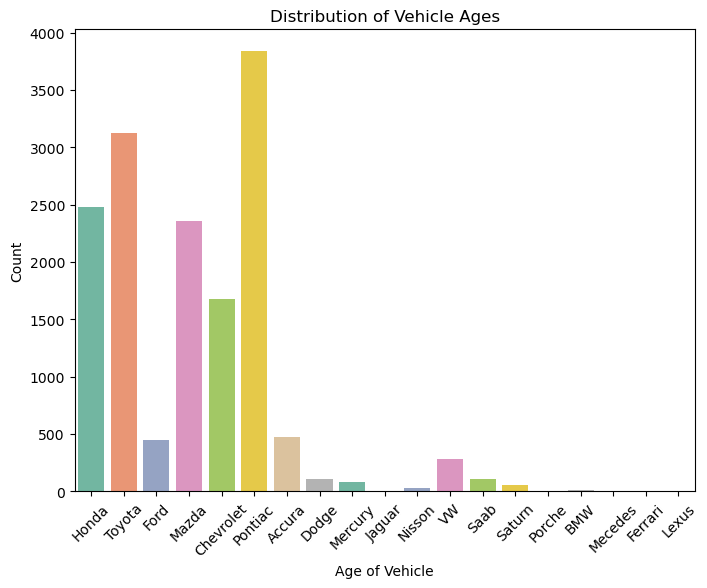

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Make', palette='Set2')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Age of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The plot visually presents the distribution of vehicle makes in the dataset, showcasing the counts for each make. It indicates which makes are more common or rare, aiding in understanding the dataset's composition in terms of vehicle manufacturers.

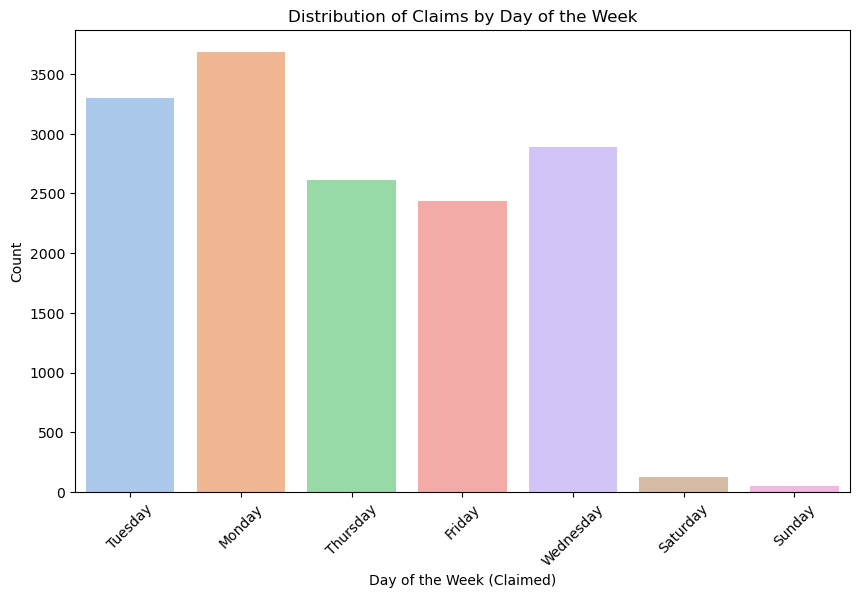

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeekClaimed', palette='pastel')
plt.title('Distribution of Claims by Day of the Week')
plt.xlabel('Day of the Week (Claimed)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The plot illustrates the distribution of insurance claims based on the day of the week they were claimed. It provides a visual representation of claim counts for each day, with bars of varying heights.This visualization allows us to identify any patterns or variations in the frequency of claims across different days of the week.

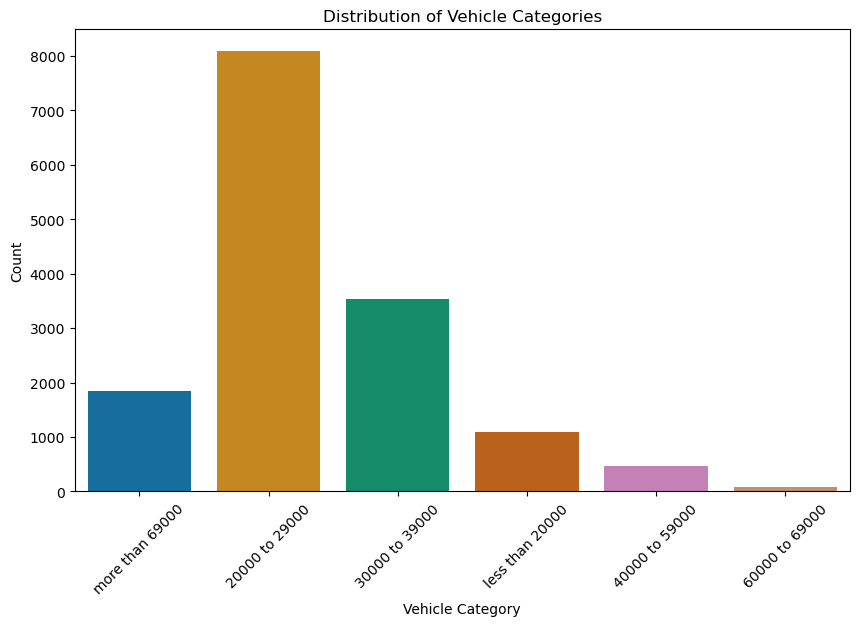

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VehiclePrice', palette='colorblind')
plt.title('Distribution of Vehicle Categories')
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

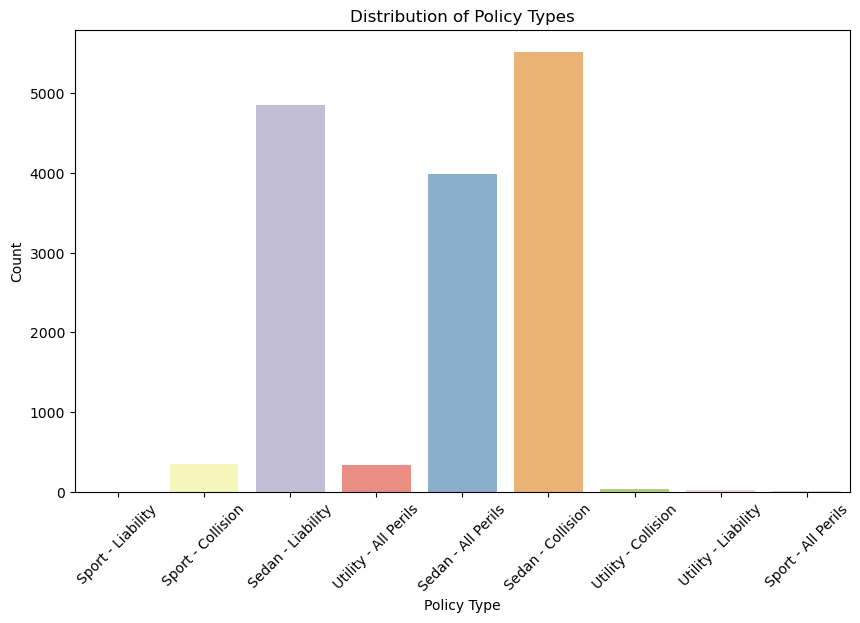

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PolicyType', palette='Set3')
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

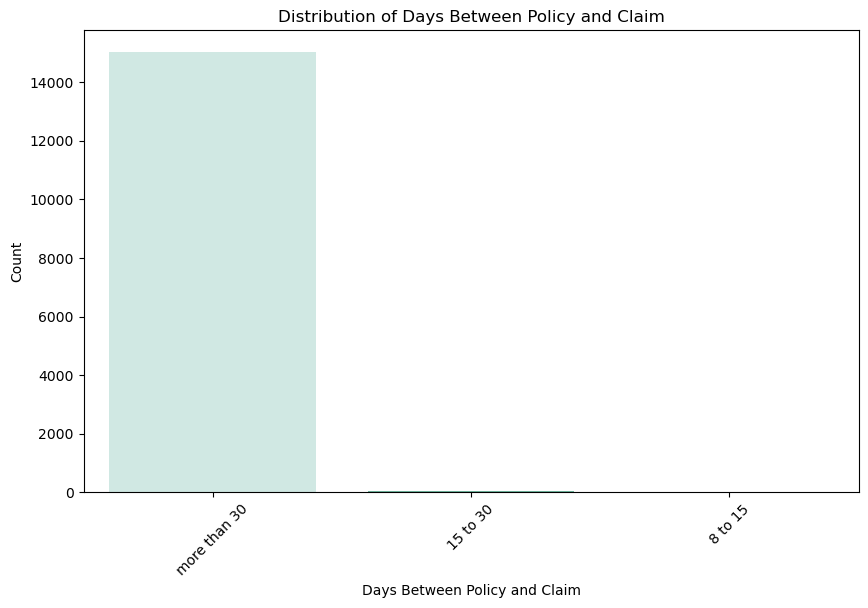

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Days_Policy_Claim', palette='BuGn')
plt.title('Distribution of Days Between Policy and Claim')
plt.xlabel('Days Between Policy and Claim')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Balancing the data 

In [19]:
print((df['FraudFound_P'].value_counts(normalize=True)*100))

0    94.092715
1     5.907285
Name: FraudFound_P, dtype: float64


In [20]:
print(df['FraudFound_P'].value_counts())

0    14208
1      892
Name: FraudFound_P, dtype: int64


In [21]:
negative=df[df.FraudFound_P==0]
positive=df[df.FraudFound_P==1]

In [22]:
print(negative.shape)

(14208, 33)


In [23]:
print(positive.shape)

(892, 33)


In [24]:
negative_sample=negative.sample(n=892)

In [25]:
print(negative_sample.shape)
print(positive.shape)

(892, 33)
(892, 33)


In [26]:
df1=pd.concat([negative_sample,positive],axis=0)
df1.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [27]:
df1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
14268,Sep,3,Wednesday,Toyota,Urban,Thursday,Sep,4,Male,Married,...,more than 7,51 to 65,No,No,External,3 to 5,no change,3 to 4,1996,All Perils
10475,Jan,5,Tuesday,Chevrolet,Urban,Thursday,Feb,2,Male,Married,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1995,Collision
11652,May,4,Friday,Pontiac,Urban,Thursday,Jun,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,Liability
3122,Jun,3,Saturday,Pontiac,Urban,Monday,Jun,3,Female,Married,...,6 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision
11723,Nov,1,Sunday,Pontiac,Rural,Tuesday,Nov,2,Female,Single,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,Nov,3,Friday,Mazda,Urban,Sunday,Nov,3,Female,Married,...,7 years,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,...,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


#### Encoding the data 

In [28]:
label_encoder = LabelEncoder()


# Apply label encoding to each categorical column
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Display the transformed DataFrame
print(df1)

       Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
14268     11            3          6    14             1                 4   
10475      4            5          5     2             1                 4   
11652      8            4          0    11             1                 4   
3122       6            3          2    11             1                 1   
11723      9            1          3    11             0                 5   
...      ...          ...        ...   ...           ...               ...   
15409      9            3          0     7             1                 3   
15412      9            4          5    11             1                 6   
15415      9            4          0    14             1                 5   
15417      9            5          4    14             0                 0   
15419      2            2          6    14             1                 4   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ..

In [29]:
X=df1.loc[:,df1.columns!='FraudFound_P']
y=df1.iloc[:,df1.columns=='FraudFound_P']


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling the data 

In [31]:
sc=StandardScaler()
X.iloc[:,:]=sc.fit_transform(X.iloc[:,:])
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
14268,1.599848,0.156966,1.547085,1.259446,0.388546,0.351296,1.581013,0.994888,0.398047,-0.592467,...,1.146036,1.672211,-0.145531,-0.07508,-0.119217,-0.928322,0.274789,5.021492,1.404657,-1.113636
10475,-0.427849,1.725743,1.058070,-1.396669,0.388546,0.351296,-0.722163,-0.591242,0.398047,-0.592467,...,0.236144,-0.795303,-0.145531,-0.07508,-0.119217,-0.928322,0.274789,-0.255882,0.160413,0.239720
11652,0.730835,0.941354,-1.387004,0.595418,0.388546,0.351296,0.141528,-1.384307,0.398047,-0.592467,...,0.236144,0.027202,-0.145531,-0.07508,-0.119217,0.853417,0.274789,-0.255882,1.404657,1.593076
3122,0.151493,0.156966,-0.408974,0.595418,0.388546,-0.951640,0.141528,0.201823,-2.512265,-0.592467,...,-0.673749,0.027202,-0.145531,-0.07508,-0.119217,0.853417,0.274789,-0.255882,-1.083832,0.239720
11723,1.020506,-1.411812,0.080041,0.595418,-2.573700,0.785608,1.005219,-0.591242,-2.512265,1.564597,...,-0.673749,-0.795303,-0.145531,-0.07508,-0.119217,0.853417,0.274789,-0.255882,1.404657,1.593076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,1.020506,0.156966,-1.387004,-0.289954,0.388546,-0.083016,1.005219,0.201823,-2.512265,-0.592467,...,0.236144,1.672211,-0.145531,-0.07508,-0.119217,-1.819191,0.274789,-0.255882,1.404657,0.239720
15412,1.020506,0.941354,1.058070,0.595418,0.388546,1.219920,1.005219,0.994888,-2.512265,1.564597,...,-1.583641,-0.795303,-0.145531,-0.07508,-0.119217,-0.037452,0.274789,-0.255882,1.404657,1.593076
15415,1.020506,0.941354,-1.387004,1.259446,0.388546,0.785608,1.005219,1.787953,0.398047,-0.592467,...,-0.673749,-0.795303,-0.145531,-0.07508,-0.119217,0.853417,0.274789,-0.255882,1.404657,0.239720
15417,1.020506,1.725743,0.569055,1.259446,-2.573700,-1.385952,-1.010060,-1.384307,0.398047,1.564597,...,-1.583641,-1.617808,-0.145531,-0.07508,-0.119217,-1.819191,0.274789,-0.255882,1.404657,0.239720


### Buiding DL Model

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1,
                    callbacks=[early_stop])

# Predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def c_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc_sc)
    return acc_sc 

print(confusion_matrix(y_test, y_pred))


Epoch 1/100
45/45 [==============================] - 3s 71ms/step - loss: 74.3012 - accuracy: 0.4926 - val_loss: 6.0846 - val_accuracy: 0.5098
Epoch 2/100
45/45 [==============================] - 3s 73ms/step - loss: 21.5250 - accuracy: 0.5109 - val_loss: 3.5345 - val_accuracy: 0.5350
Epoch 3/100
45/45 [==============================] - 4s 86ms/step - loss: 6.2375 - accuracy: 0.5186 - val_loss: 1.2150 - val_accuracy: 0.4930
Epoch 4/100
45/45 [==============================] - 3s 56ms/step - loss: 1.7375 - accuracy: 0.4779 - val_loss: 0.8836 - val_accuracy: 0.4706
Epoch 5/100
45/45 [==============================] - 3s 58ms/step - loss: 0.9988 - accuracy: 0.4870 - val_loss: 0.6953 - val_accuracy: 0.5014
Epoch 6/100
45/45 [==============================] - 5s 105ms/step - loss: 0.8116 - accuracy: 0.5060 - val_loss: 0.8223 - val_accuracy: 0.4510
Epoch 7/100
45/45 [==============================] - 5s 109ms/step - loss: 0.7503 - accuracy: 0.5004 - val_loss: 0.7030 - val_accuracy: 0.4874
Ep

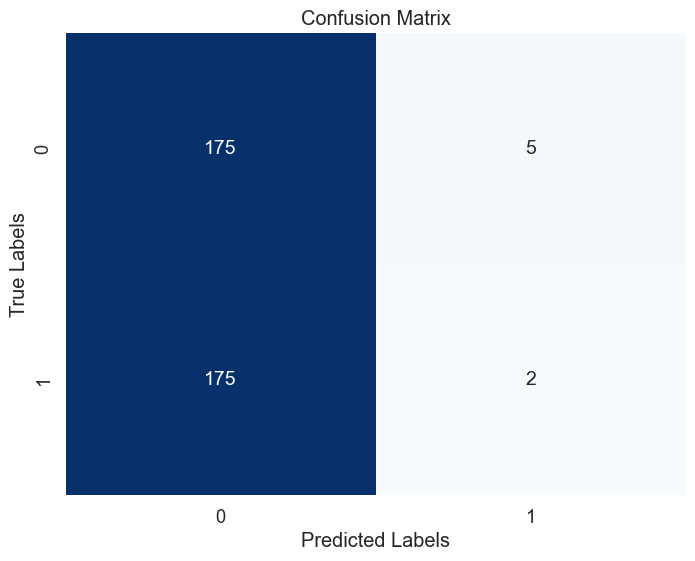

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

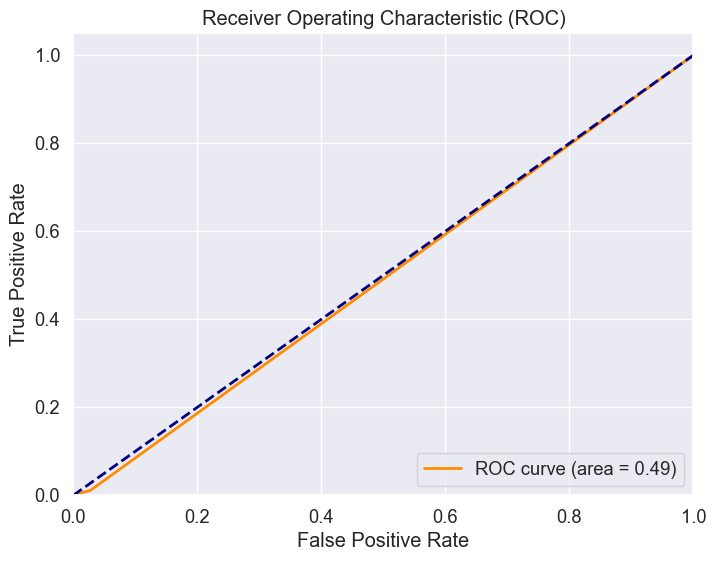

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()